<a href="https://colab.research.google.com/github/cmd16/cs344/blob/master/hw04/hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Build a Keras-based ConvNet for Keras’s Fashion MNIST dataset (fashion_mnist). Experiment with different network architectures, submit your most performant network, and report the results.

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [5]:
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [23]:
# def decode_newswire(i):
#     return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])

print(
    f'training set \
        \n\tcount: {len(train_data)} \
        \n\tshape: {train_data.shape} \
        \n\timage data type: {train_data.dtype} \
        \n\tlabel data type: {train_targets.dtype} \
        \n\tlabel shape: {train_targets.shape} \n',
    f'testing set \
        \n\tcount: {len(test_targets)} \
        \n\tshape: {test_data.shape}\n',
    # f'example \
    #     \n\tarticle values: {test_data[0]} \
    #     \n\tarticle words: {decode_newswire(0)} \
    #     \n\tarticle topic: {test_labels[0]}'
)

training set         
	count: 60000         
	shape: (60000, 28, 28)         
	image data type: uint8         
	label data type: uint8         
	label shape: (60000,) 
 testing set         
	count: 10000         
	shape: (10000, 28, 28)



60000 training samples and 10000 test samples, all of type `uint8`. `uint8` data type contains all whole numbers from 0 to 255. This data type is mostly used in graphics. [uint8 Data Type](https://www.cs.utah.edu/~germain/PPS/Topics/Matlab/uint8.html)

But first, let's try to see what we are looking at. I found the following chunk of code from this tutorial https://www.tensorflow.org/tutorials/keras/classification, but I looked only at this part: how to generate an image from the data.

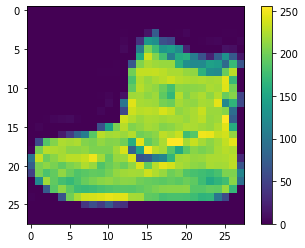

In [15]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

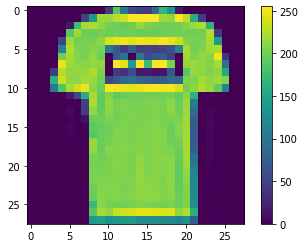

In [16]:
plt.figure()
plt.imshow(train_data[1])
plt.colorbar()
plt.grid(False)
plt.show()

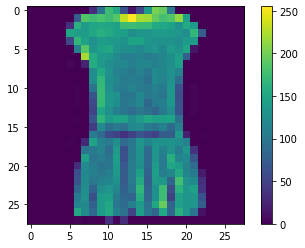

In [17]:
plt.figure()
plt.imshow(train_data[3])
plt.colorbar()
plt.grid(False)
plt.show()

That's enough to get an idea. It seems different images show different types of clothing articles. It looks like we have a shoe, a shirt, and a dress.

In [19]:
train_targets[0]

9

In [24]:
train_targets[1]

0

In [25]:
train_targets[2]

0

Ok, so each image has a numerical label, and it seems the shirt and the dress have the same label (which is a different label from the shoe).

If I were doing this not for homework, I might do some more looking into the data (like looking up information on the dataset). But since this is a homework assignment I'm not sure how much I can do before it becomes just finding and following someone else's approach. At any rate, I think I have enough information to try to train a model.

In our example of mnist in class, we did a reshape step. But as far as I can tell, that step is not necessary. We do, however need to change the data type so we can get it to work in our model.